### IMPORT DATASETS AND LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix


In [3]:
# Load the training dataset
instagram_df_train=pd.read_csv("insta_train.csv")
instagram_df_train


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [4]:
# Load the testing data
instagram_df_test=pd.read_csv("insta_test.csv")
instagram_df_test


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1


In [5]:
instagram_df_train.head(5)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [6]:
instagram_df_train.tail(5)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1
575,1,0.27,1,0.00,0,0,0,0,2,150,487,1


In [7]:
instagram_df_test.head(5)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0


In [8]:
instagram_df_test.tail(5)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
115,1,0.29,1,0.0,0,0,0,0,13,114,811,1
116,1,0.40,1,0.0,0,0,0,0,4,150,164,1
117,1,0.00,2,0.0,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.0,0,0,0,0,1,219,1695,1
119,1,0.44,1,0.0,0,0,0,0,3,39,68,1


### PERFORM EXPLORATORY DATA ANALYSIS

In [9]:
# Getting dataframe info
instagram_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [10]:
# Get the statistical summary of the dataframe
instagram_df_train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [11]:
# Checking if null values exist
instagram_df_train.isnull().sum()


profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [12]:
# Get the number of unique values in the "profile pic" feature
instagram_df_train['profile pic'].value_counts()

1    404
0    172
Name: profile pic, dtype: int64

In [13]:
# Get the number of unique values in "fake" (Target column)
instagram_df_train['fake'].value_counts()


1    288
0    288
Name: fake, dtype: int64

In [14]:
instagram_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           120 non-null    int64  
 1   nums/length username  120 non-null    float64
 2   fullname words        120 non-null    int64  
 3   nums/length fullname  120 non-null    float64
 4   name==username        120 non-null    int64  
 5   description length    120 non-null    int64  
 6   external URL          120 non-null    int64  
 7   private               120 non-null    int64  
 8   #posts                120 non-null    int64  
 9   #followers            120 non-null    int64  
 10  #follows              120 non-null    int64  
 11  fake                  120 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 11.4 KB


In [15]:
instagram_df_test.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000
mean,0.758333,0.179917,1.550000,0.071333,0.041667,27.200000,0.100000,0.308333,82.866667,4.959472e+04,779.266667,0.500000
std,0.429888,0.241492,1.187116,0.209429,0.200664,42.588632,0.301258,0.463741,230.468136,3.816126e+05,1409.383558,0.502096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.725000e+01,119.250000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2.165000e+02,354.500000,0.500000
75%,1.000000,0.330000,2.000000,0.000000,0.000000,45.250000,0.000000,1.000000,58.250000,5.932500e+02,668.250000,1.000000
max,1.000000,0.890000,9.000000,1.000000,1.000000,149.000000,1.000000,1.000000,1879.000000,4.021842e+06,7453.000000,1.000000


In [16]:
instagram_df_test.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [17]:
instagram_df_test['profile pic'].value_counts()

1    91
0    29
Name: profile pic, dtype: int64

In [18]:
instagram_df_test['fake'].value_counts()

1    60
0    60
Name: fake, dtype: int64

### PERFORM DATA VISUALIZATION

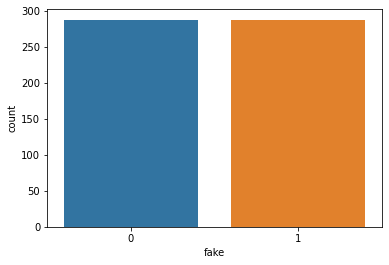

In [19]:
# Visualize the data
sns.countplot(instagram_df_train['fake'])

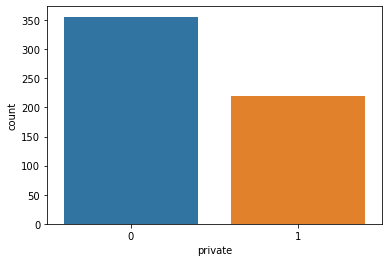

In [20]:
# Visualize the private column data
sns.countplot(instagram_df_train['private'])

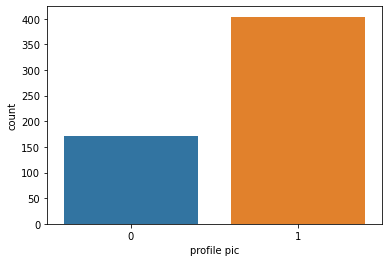

In [21]:
# Visualize the "profile pic" column data
sns.countplot(instagram_df_train['profile pic'])

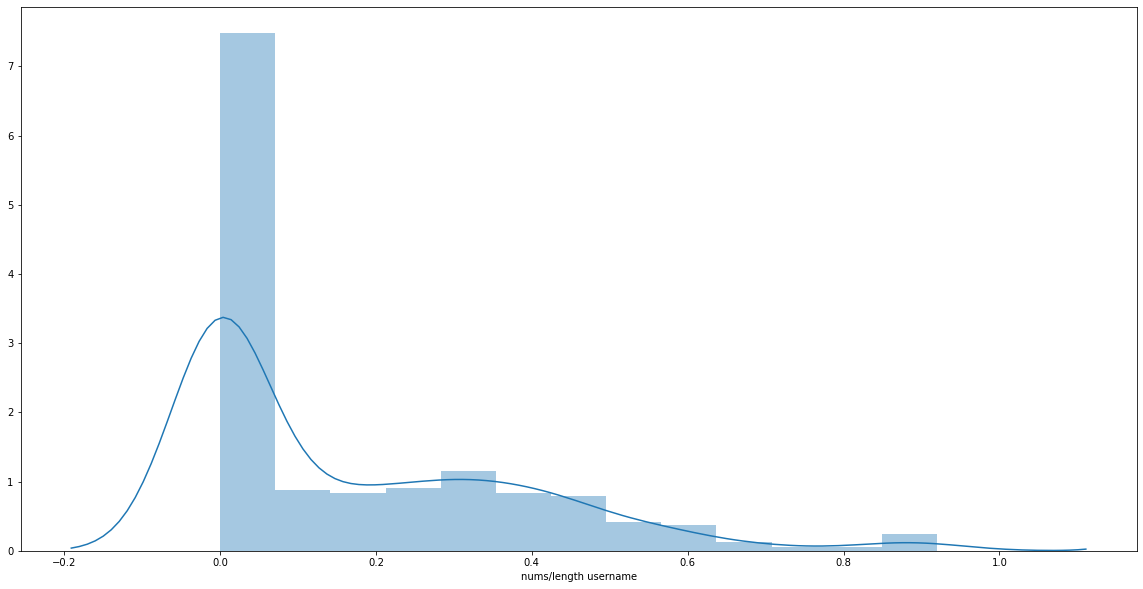

In [22]:
# Visualize the data
plt.figure(figsize = (20, 10))
sns.distplot(instagram_df_train['nums/length username'])


<Figure size 1440x1440 with 0 Axes>

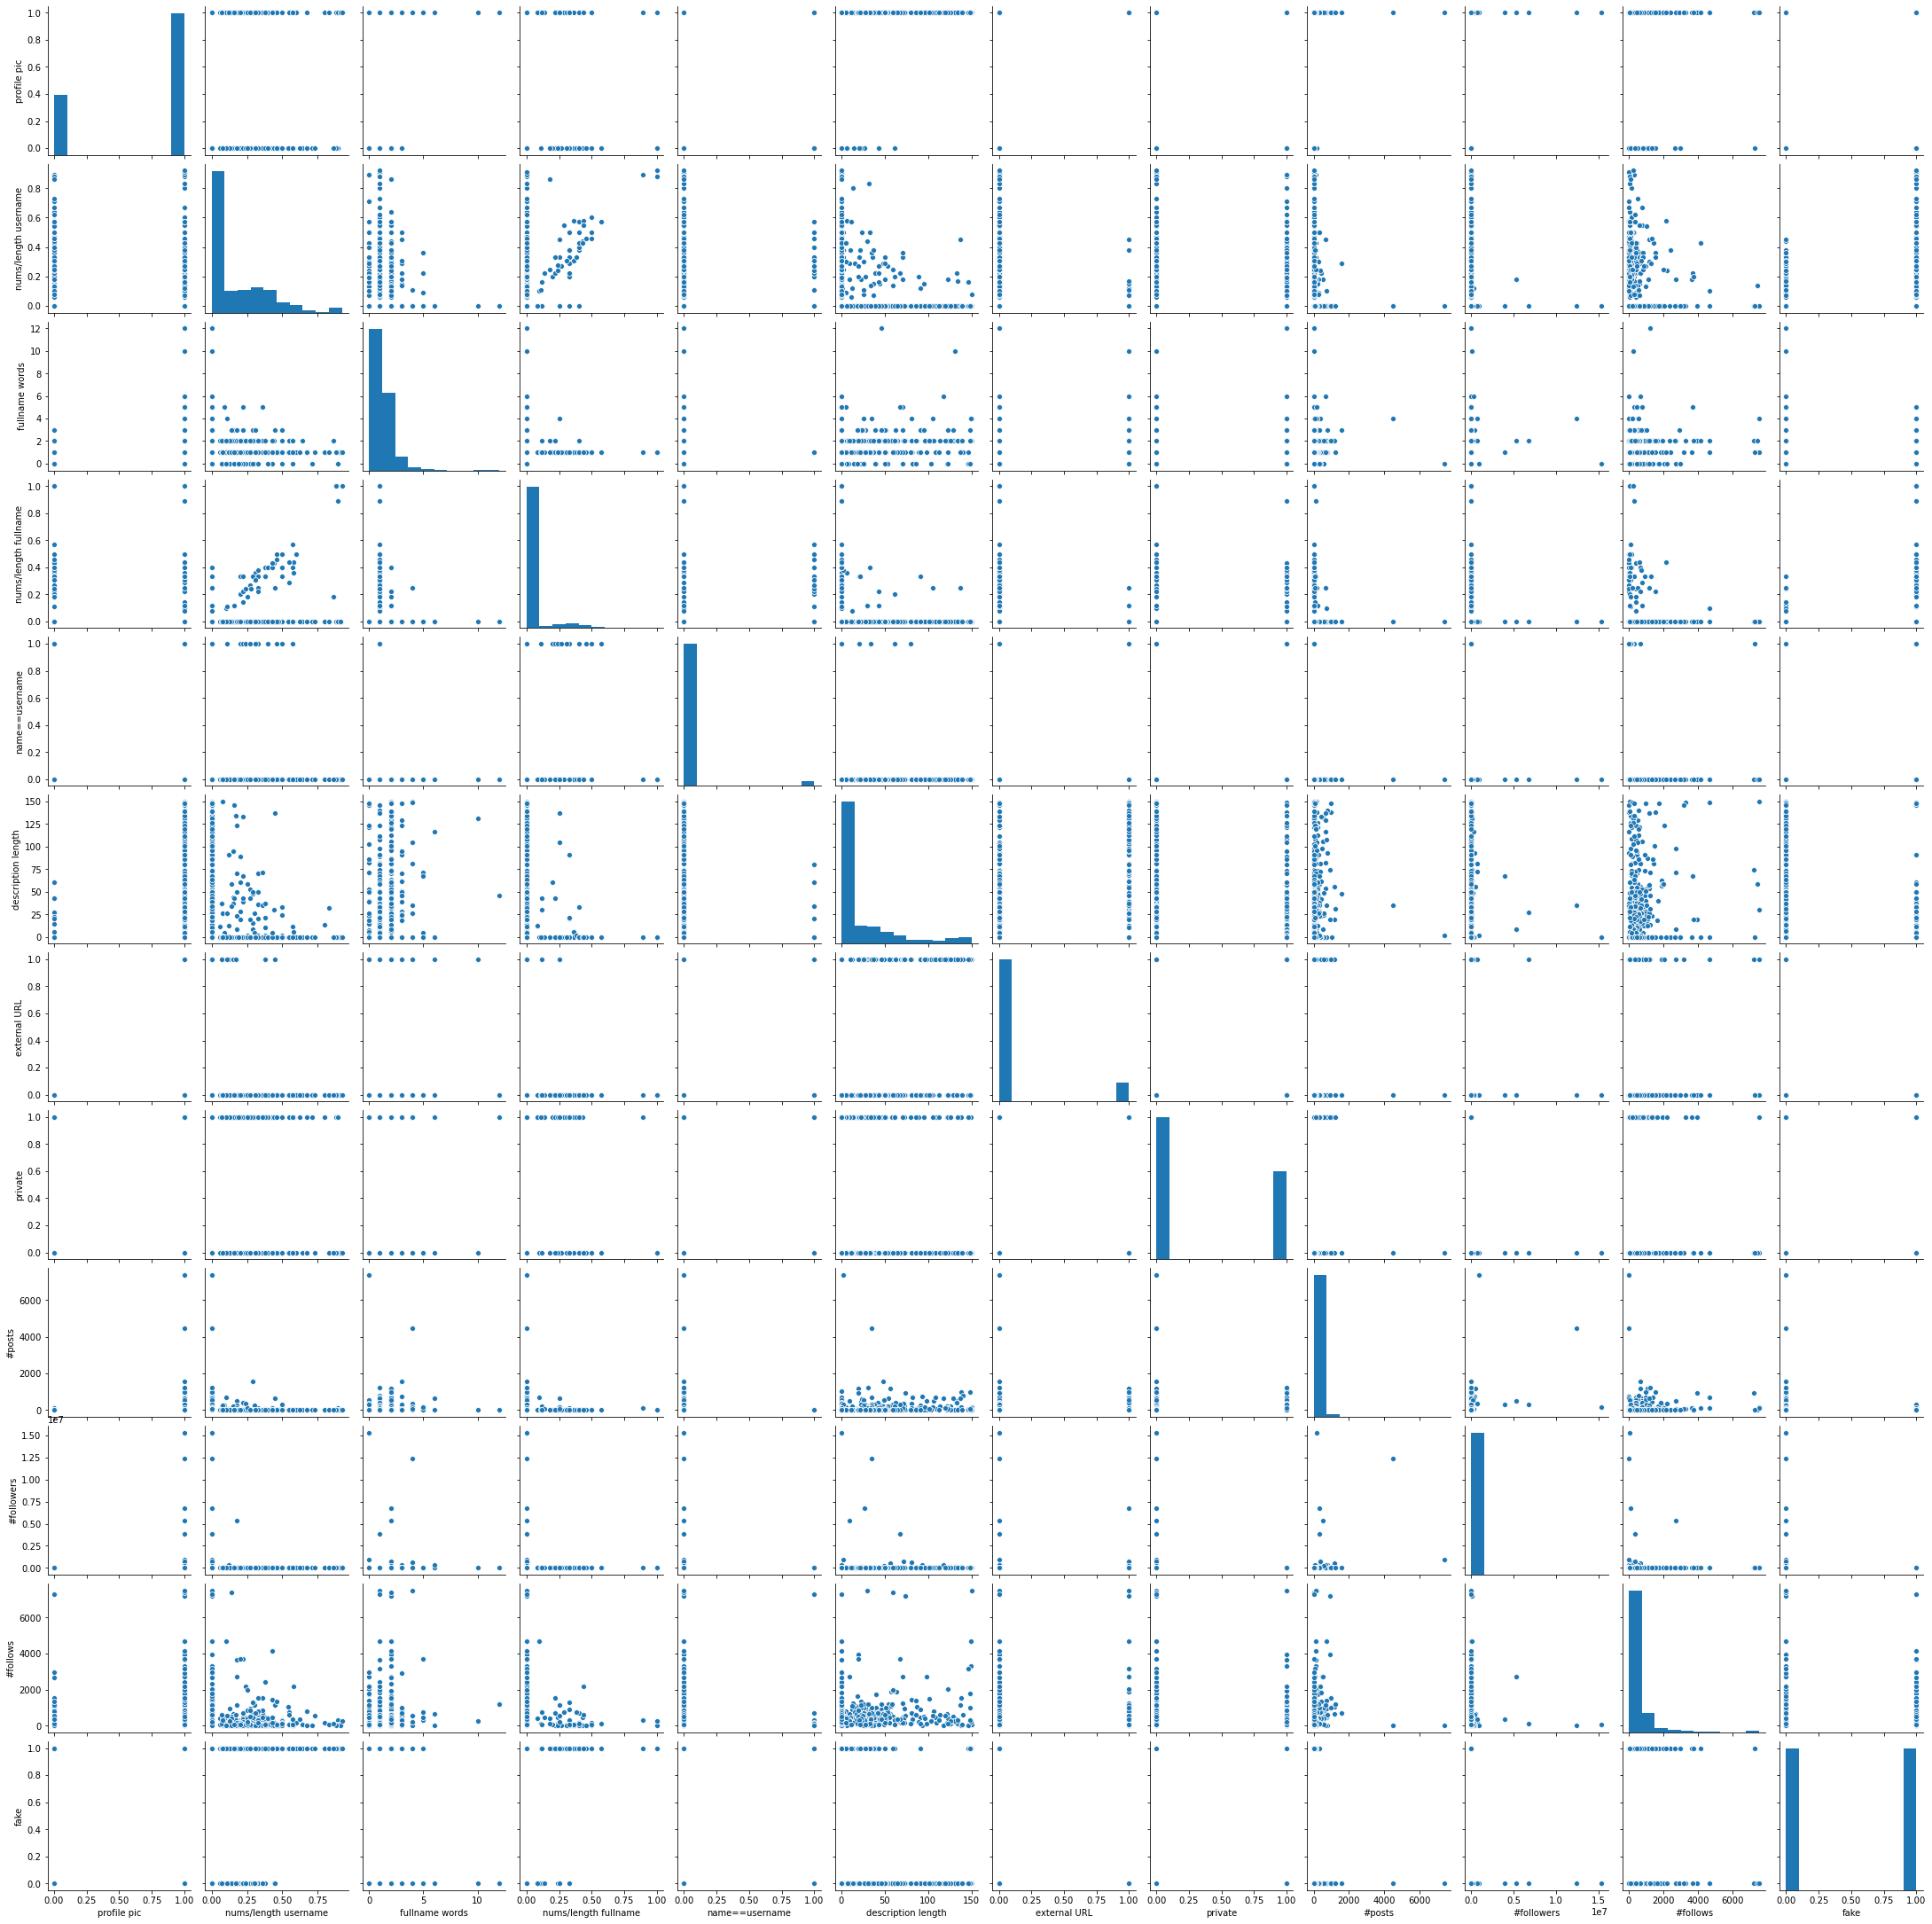

In [23]:
# Plot pairplot
plt.figure(figsize = (20, 20))
sns.pairplot(instagram_df_train)

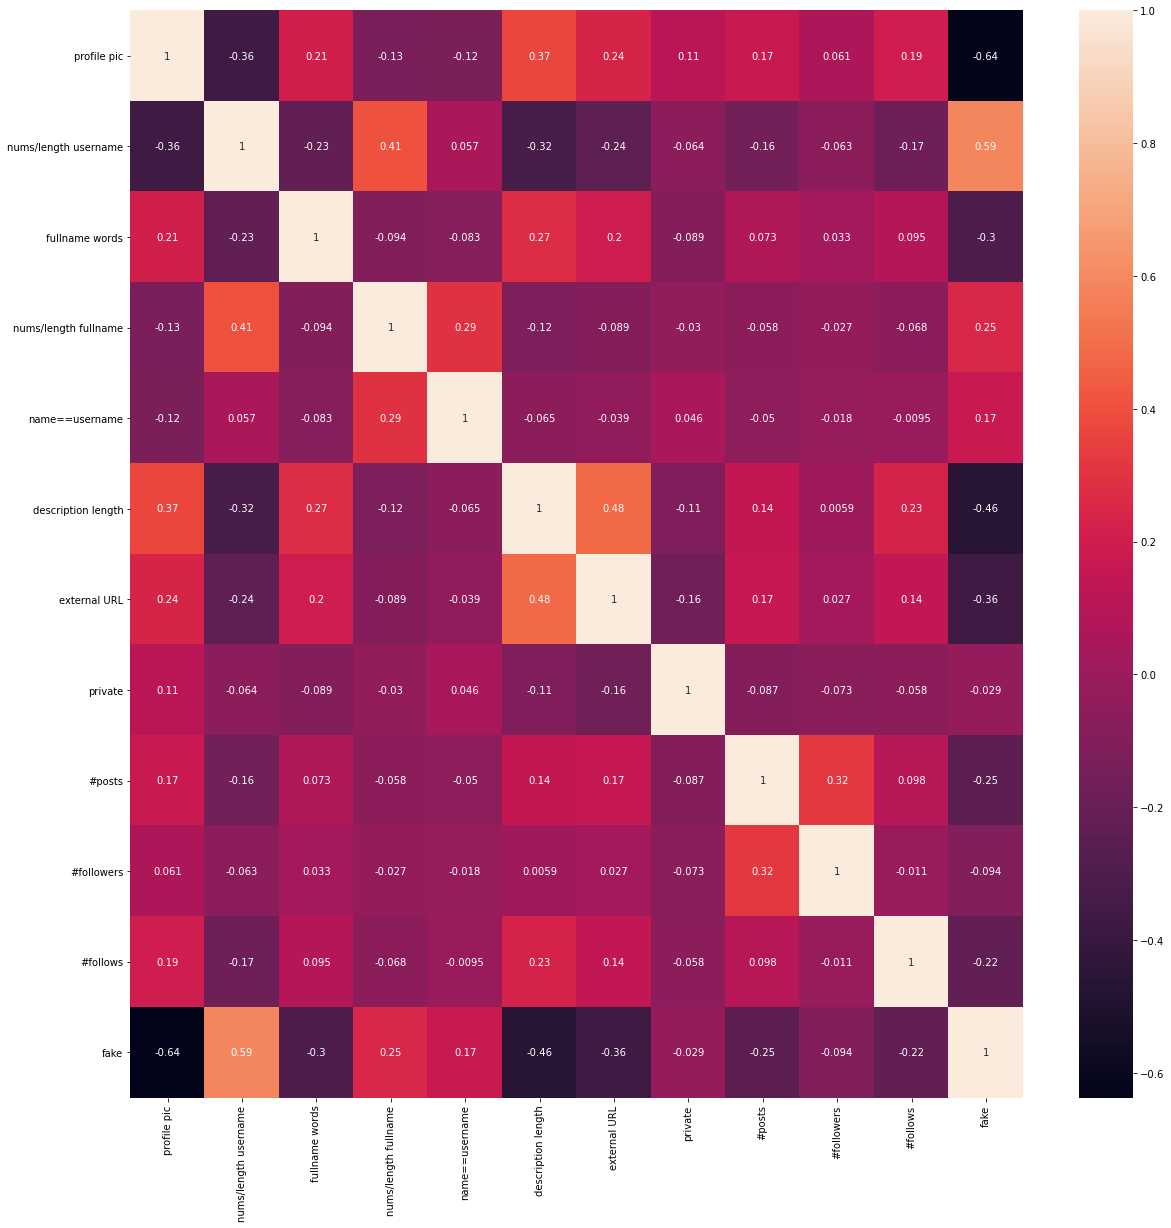

In [24]:
# Correlation plot
plt.figure(figsize=(20, 20))
cm = instagram_df_train.corr()
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

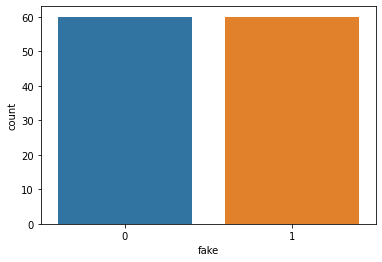

In [25]:
sns.countplot(instagram_df_test['fake'])

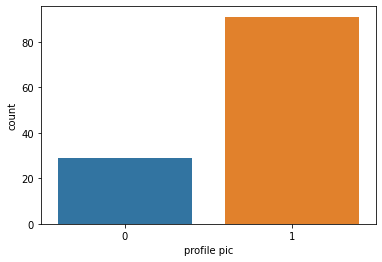

In [26]:
sns.countplot(instagram_df_test['profile pic'])

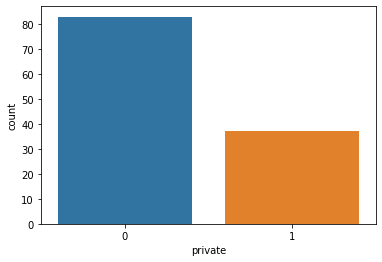

In [27]:
sns.countplot(instagram_df_test['private'])

### PREPARE THE DATA TO FEED THE MODEL

In [28]:
# Training and testing dataset (inputs)
X_train=instagram_df_train.drop(columns=['fake'])
X_test=instagram_df_test.drop(columns=['fake'])
X_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.00,0,53,0,0,32,1000,955
1,1,0.00,2,0.00,0,44,0,0,286,2740,533
2,1,0.10,2,0.00,0,0,0,1,13,159,98
3,1,0.00,1,0.00,0,82,0,0,679,414,651
4,1,0.00,2,0.00,0,0,0,1,6,151,126
...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596
572,1,0.38,1,0.33,0,21,0,0,44,66,75
573,1,0.57,2,0.00,0,0,0,0,4,96,339
574,1,0.57,1,0.00,0,11,0,0,0,57,73


In [29]:
X_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.33,1,0.33,1,30,0,1,35,488,604
1,1,0.00,5,0.00,0,64,0,1,3,35,6
2,1,0.00,2,0.00,0,82,0,1,319,328,668
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369
4,1,0.50,1,0.00,0,76,0,1,6,225,356
...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811
116,1,0.40,1,0.00,0,0,0,0,4,150,164
117,1,0.00,2,0.00,0,0,0,0,3,833,3572
118,0,0.17,1,0.00,0,0,0,0,1,219,1695


In [30]:
# Training and testing dataset (Outputs)
y_train = instagram_df_train['fake']
y_test = instagram_df_test['fake']

In [31]:
y_train

0      0
1      0
2      0
3      0
4      0
      ..
571    1
572    1
573    1
574    1
575    1
Name: fake, Length: 576, dtype: int64

In [32]:
y_test

0      0
1      0
2      0
3      0
4      0
      ..
115    1
116    1
117    1
118    1
119    1
Name: fake, Length: 120, dtype: int64

In [33]:
# Scale the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x=StandardScaler()
X_train=scaler_x.fit_transform(X_train)
X_test=scaler_x.fit_transform(X_test)

In [34]:

y_train = tf.keras.utils.to_categorical(y_train, num_classes = 2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 2)

In [35]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [36]:
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [37]:
X_train.shape,X_test.shape

((576, 11), (120, 11))

In [38]:
y_train.shape,y_test.shape

((576, 2), (120, 2))

In [39]:
print(len(X_train)/(len(X_train)+len(X_test))*100)

82.75862068965517


### BUILD AND TRAIN A SIMPLE DEEP LEARNING MODEL

In [40]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model=Sequential()
model.add(Dense(50,input_dim=X_train.shape[1],activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(25,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(2,activation="softmax"))

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                600       
_________________________________________________________________
dense_1 (Dense)              (None, 150)               7650      
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                3775      
_________________________________________________________________
dropout_1 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 52        
Total params: 12,077
Trainable params: 12,077
Non-trainable params: 0
____________________________________________________

In [42]:
opt=keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])

In [43]:
epochs_hist=model.fit(X_train,y_train,epochs=500,verbose=1,validation_split=0.1)

Epoch 1/500
17/17 [==============================] - 1s 22ms/step - loss: 0.5181 - accuracy: 0.7453 - val_loss: 0.0878 - val_accuracy: 0.9828
Epoch 2/500
17/17 [==============================] - 0s 6ms/step - loss: 0.3384 - accuracy: 0.8853 - val_loss: 0.1696 - val_accuracy: 0.8966
Epoch 3/500
17/17 [==============================] - 0s 6ms/step - loss: 0.2121 - accuracy: 0.9226 - val_loss: 0.1381 - val_accuracy: 0.9310
Epoch 4/500
17/17 [==============================] - 0s 6ms/step - loss: 0.2284 - accuracy: 0.9089 - val_loss: 0.2609 - val_accuracy: 0.8966
Epoch 5/500
17/17 [==============================] - 0s 7ms/step - loss: 0.2158 - accuracy: 0.9159 - val_loss: 0.2446 - val_accuracy: 0.8793
Epoch 6/500
17/17 [==============================] - 0s 8ms/step - loss: 0.2230 - accuracy: 0.9211 - val_loss: 0.2624 - val_accuracy: 0.8966
Epoch 7/500
17/17 [==============================] - 0s 6ms/step - loss: 0.1871 - accuracy: 0.9297 - val_loss: 0.1292 - val_accuracy: 0.9483
Epoch 8/500


Epoch 59/500
17/17 [==============================] - 0s 7ms/step - loss: 0.1018 - accuracy: 0.9581 - val_loss: 0.1264 - val_accuracy: 0.9655
Epoch 60/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0932 - accuracy: 0.9607 - val_loss: 0.3400 - val_accuracy: 0.8793
Epoch 61/500
17/17 [==============================] - 0s 7ms/step - loss: 0.1172 - accuracy: 0.9532 - val_loss: 0.2893 - val_accuracy: 0.9483
Epoch 62/500
17/17 [==============================] - 0s 15ms/step - loss: 0.1029 - accuracy: 0.9542 - val_loss: 0.3748 - val_accuracy: 0.8793
Epoch 63/500
17/17 [==============================] - 0s 14ms/step - loss: 0.0898 - accuracy: 0.9639 - val_loss: 0.2049 - val_accuracy: 0.9483
Epoch 64/500
17/17 [==============================] - 0s 12ms/step - loss: 0.1439 - accuracy: 0.9273 - val_loss: 0.2911 - val_accuracy: 0.8793
Epoch 65/500
17/17 [==============================] - 0s 7ms/step - loss: 0.0909 - accuracy: 0.9654 - val_loss: 0.2277 - val_accuracy: 0.9310
Epo

17/17 [==============================] - 0s 5ms/step - loss: 0.0847 - accuracy: 0.9513 - val_loss: 0.6484 - val_accuracy: 0.9138
Epoch 174/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0776 - accuracy: 0.9684 - val_loss: 0.4421 - val_accuracy: 0.9310
Epoch 175/500
17/17 [==============================] - 0s 5ms/step - loss: 0.0709 - accuracy: 0.9637 - val_loss: 0.3450 - val_accuracy: 0.9310
Epoch 176/500
17/17 [==============================] - 0s 5ms/step - loss: 0.0610 - accuracy: 0.9628 - val_loss: 0.4157 - val_accuracy: 0.9310
Epoch 177/500
17/17 [==============================] - 0s 5ms/step - loss: 0.0665 - accuracy: 0.9571 - val_loss: 0.5123 - val_accuracy: 0.9310
Epoch 178/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0819 - accuracy: 0.9539 - val_loss: 0.8114 - val_accuracy: 0.9138
Epoch 179/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0609 - accuracy: 0.9735 - val_loss: 1.1590 - val_accuracy: 0.9138
Epoch 180/500

17/17 [==============================] - 0s 5ms/step - loss: 0.0420 - accuracy: 0.9739 - val_loss: 0.5297 - val_accuracy: 0.9483
Epoch 288/500
17/17 [==============================] - 0s 5ms/step - loss: 0.0656 - accuracy: 0.9729 - val_loss: 0.4005 - val_accuracy: 0.9483
Epoch 289/500
17/17 [==============================] - 0s 5ms/step - loss: 0.0762 - accuracy: 0.9607 - val_loss: 0.4881 - val_accuracy: 0.9483
Epoch 290/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0728 - accuracy: 0.9537 - val_loss: 0.5874 - val_accuracy: 0.8966
Epoch 291/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0618 - accuracy: 0.9676 - val_loss: 0.4570 - val_accuracy: 0.9483
Epoch 292/500
17/17 [==============================] - 0s 8ms/step - loss: 0.0668 - accuracy: 0.9720 - val_loss: 0.2126 - val_accuracy: 0.9483
Epoch 293/500
17/17 [==============================] - 0s 5ms/step - loss: 0.0713 - accuracy: 0.9625 - val_loss: 0.6217 - val_accuracy: 0.9310
Epoch 294/500

17/17 [==============================] - 0s 5ms/step - loss: 0.0607 - accuracy: 0.9709 - val_loss: 0.8372 - val_accuracy: 0.9483
Epoch 402/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0661 - accuracy: 0.9732 - val_loss: 0.6479 - val_accuracy: 0.9483
Epoch 403/500
17/17 [==============================] - 0s 5ms/step - loss: 0.0558 - accuracy: 0.9807 - val_loss: 0.4738 - val_accuracy: 0.9483
Epoch 404/500
17/17 [==============================] - 0s 5ms/step - loss: 0.0765 - accuracy: 0.9676 - val_loss: 1.6076 - val_accuracy: 0.8966
Epoch 405/500
17/17 [==============================] - 0s 5ms/step - loss: 0.0936 - accuracy: 0.9634 - val_loss: 0.5170 - val_accuracy: 0.8966
Epoch 406/500
17/17 [==============================] - 0s 5ms/step - loss: 0.0926 - accuracy: 0.9588 - val_loss: 0.2404 - val_accuracy: 0.9483
Epoch 407/500
17/17 [==============================] - 0s 5ms/step - loss: 0.1196 - accuracy: 0.9449 - val_loss: 0.1804 - val_accuracy: 0.9310
Epoch 408/500

### ASSESS THE PERORMANCE OF TRAINED MODEL

In [44]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


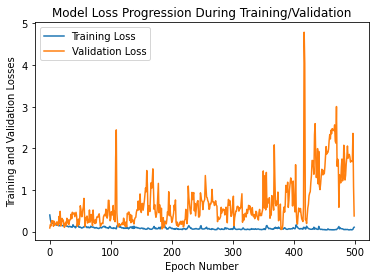

In [45]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])


In [46]:
predicted=model.predict(X_test)

In [47]:
predicted_value = []
test = []
for i in predicted:
    predicted_value.append(np.argmax(i))
    
for i in y_test:
    test.append(np.argmax(i))

In [48]:
print(classification_report(test,predicted_value))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89        60
           1       0.86      0.93      0.90        60

    accuracy                           0.89       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.89      0.89      0.89       120



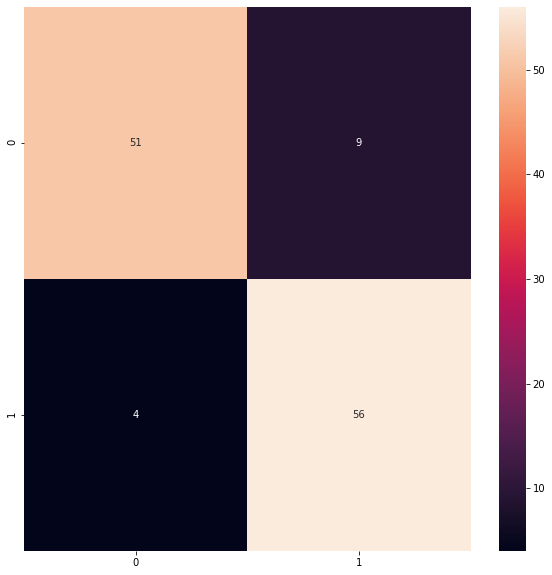

In [61]:
plt.figure(figsize=(10, 10))
cm=confusion_matrix(test,predicted_value)
sns.heatmap(cm,annot=True)